# US Census Income Prediction - Exploratory Data Analysis

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from project import paths

In [4]:
data = pd.read_pickle(paths['processed'] / 'data.pkl')
data.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran,veterans benefits,weeks worked in year,year,TARGET
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [7]:
data.columns

Index(['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household', 'instance weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
 

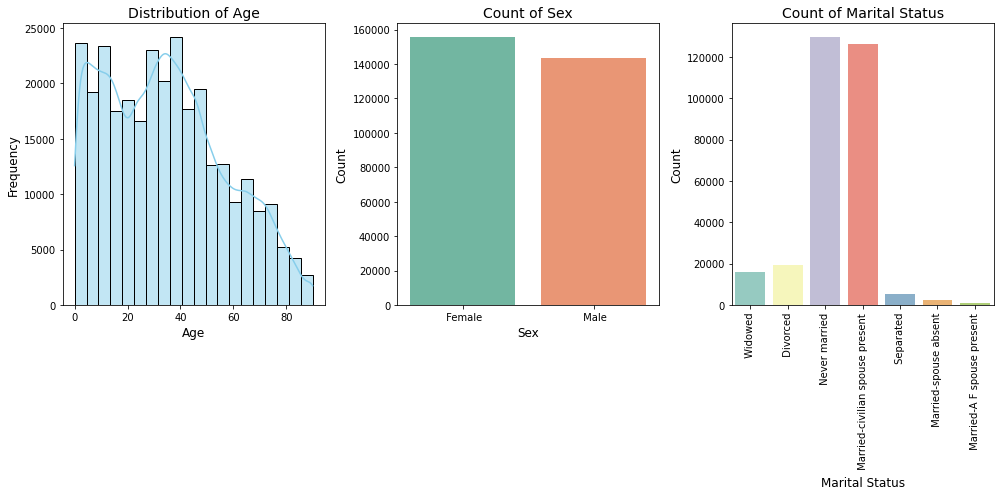

In [17]:
plt.figure(figsize=(14, 7))  # Adjust the size to make it wide

# 1. Plot for age (Histogram)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(data['age'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 2. Plot for sex (Countplot)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.countplot(x=data['sex'], palette='Set2')
plt.title('Count of Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 3. Plot for marital stat (Countplot)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.countplot(x=data['marital stat'], palette='Set3')
plt.title('Count of Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate the y-axis labels on the last plot (3rd subplot) by 60 degrees
plt.gca().get_xaxis().set_tick_params(rotation=90)  # Rotate y-axis labels by 60 degrees

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [18]:
data.columns

Index(['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household', 'instance weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
 

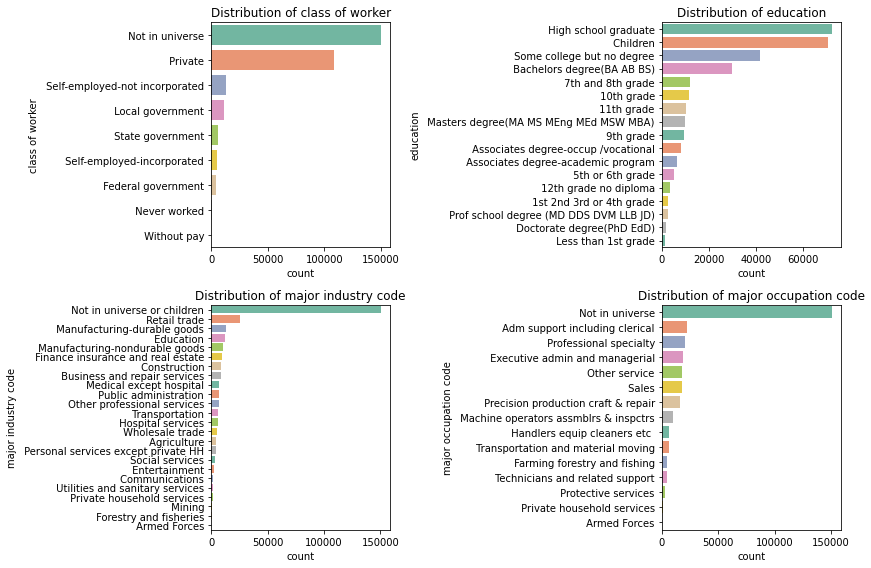

In [19]:
# Categorical features to explore
categorical_features = ['class of worker', 'education', 'major industry code', 'major occupation code']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=data[feature], palette="Set2", order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

In [14]:
print(data.shape) # almost 300,000 records

# Look at the class distribution (counts)
class_counts = data['TARGET'].value_counts()
print("Class Distribution (Counts):")
print(class_counts)

# Calculate and print the class distribution as percentages
class_percentages = class_counts / data.shape[0] * 100
print("\nClass Distribution (Percentages):")
print(class_percentages) # aligns with metadata file

(299285, 42)
Class Distribution (Counts):
 - 50000.    280717
 50000+.      18568
Name: TARGET, dtype: int64

Class Distribution (Percentages):
 - 50000.    93.79588
 50000+.      6.20412
Name: TARGET, dtype: float64


In [ ]:
# Basic summary statistics
print(data.describe())

# Info about data types and missing values
print(data.info())

# Check for missing values
print(data.isnull().sum())

### Quick look at numerical features

In [84]:
numerical_features = [] # Initialise empty list

for col in data.columns:
        if data[col].dtype == 'int64':
            numerical_features.append(col)
numerical_features

['age',
 'wage per hour',
 'capital gains',
 'capital losses',
 'dividends from stocks',
 'num persons worked for employer',
 'weeks worked in year']

In [86]:
data['num persons worked for employer'].value_counts()

0    143872
6     54839
1     34752
4     21438
3     20261
2     15161
5      8962
Name: num persons worked for employer, dtype: int64

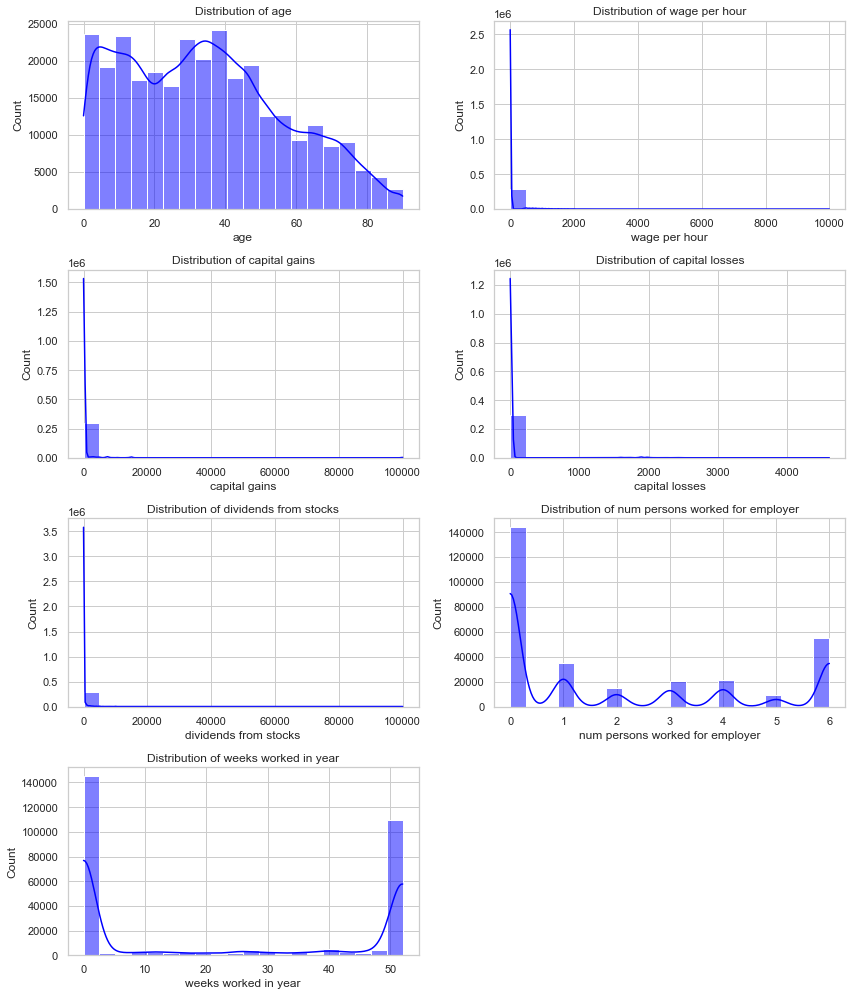

In [85]:
# Plot numerical features

plt.figure(figsize=(12, 14))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[feature], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

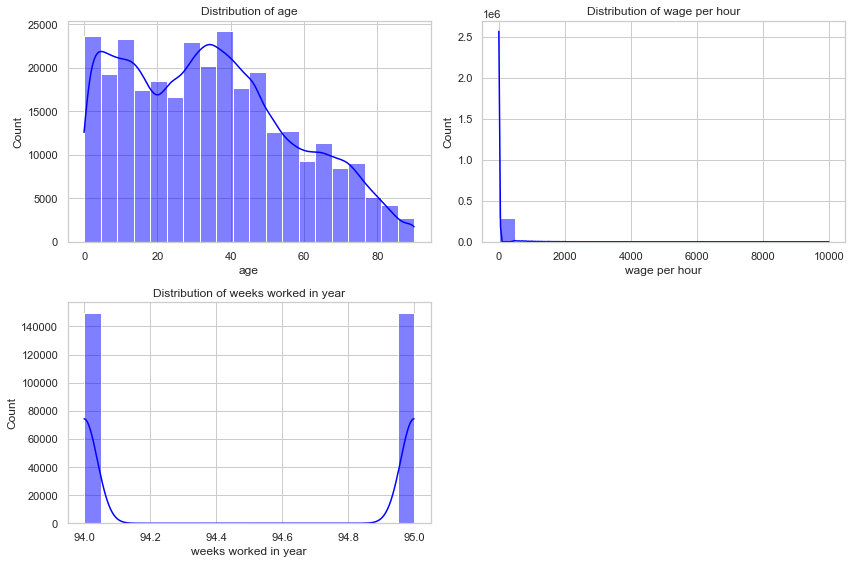

In [30]:
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Plot histograms for numerical features
numerical_features = ['age', 'wage per hour', 'weeks worked in year']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

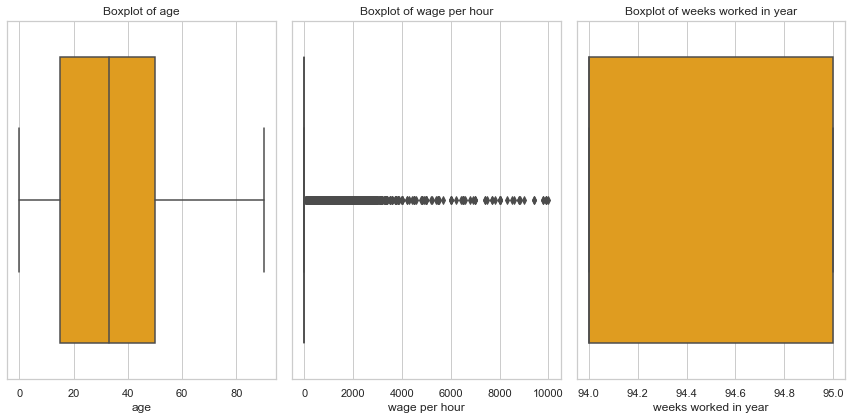

In [32]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[feature], color='orange')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()

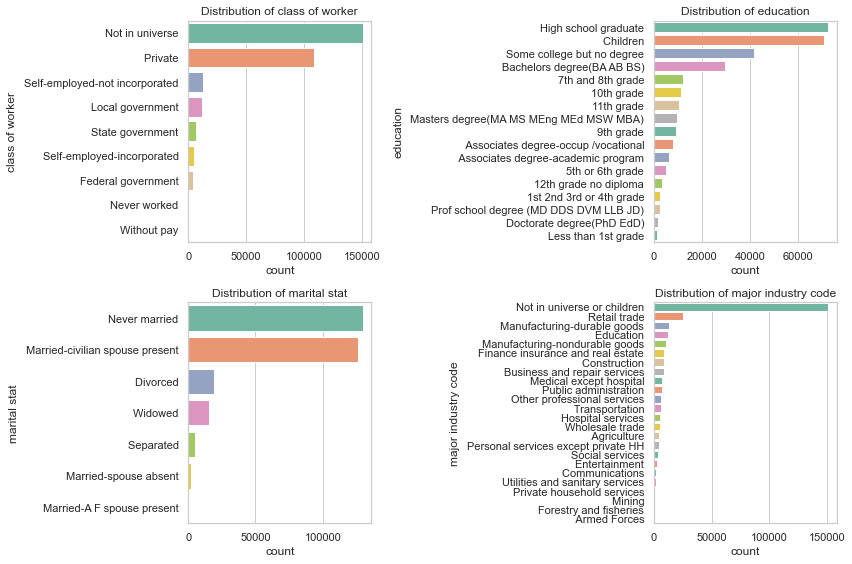

In [35]:
# Categorical features to explore
categorical_features = ['class of worker', 'education', 'marital stat', 'major industry code']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=data[feature], palette="Set2", order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

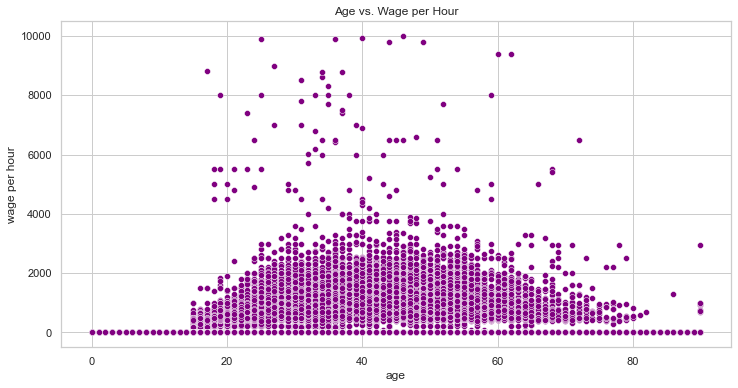

In [39]:
# Scatter plots to examine relationships
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='wage per hour', data=data, color='purple')
plt.title('Age vs. Wage per Hour')
plt.show()

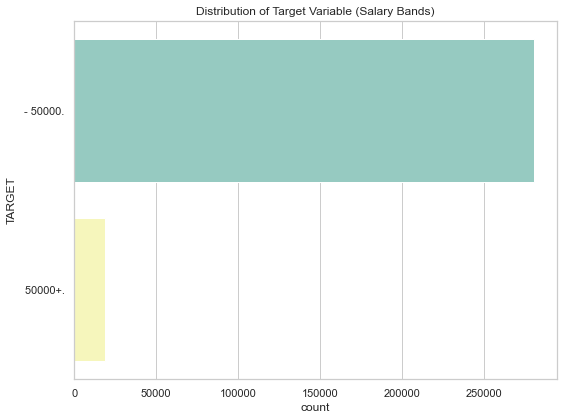

In [40]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(y=data['TARGET'], palette="Set3")
plt.title('Distribution of Target Variable (Salary Bands)')
plt.tight_layout()
plt.show()
